In [1]:
import pandas as pd
import numpy as np

In [2]:
df_diab = pd.read_csv('diabetes.csv')

In [3]:
df_diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df_diab.shape

(768, 9)

In [5]:
df_diab.Outcome.unique()

array([1, 0])

In [6]:
df_diab.Outcome.value_counts()/df_diab.shape[0]

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [7]:
df_diab.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
X = df_diab.drop(['Outcome'],axis=1)
y = df_diab['Outcome']

In [9]:
np.random.seed(12345)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train,y_test = train_test_split(X,
                                                   y,
                                                   stratify = y,
                                                   test_size=0.2,
                                                   random_state=12345)

In [12]:
y_train.sum()/614, y_test.sum()/154

(0.3485342019543974, 0.35064935064935066)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
# X-scaled = (X - mean)/sd -> z value

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
import tensorflow as tf

In [17]:
print(tf.__version__)

2.15.0


In [18]:
np.__version__

'1.23.5'

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
from tensorflow.keras.layers import Dense, Input

In [21]:
model = Sequential()

In [22]:
X_train_scaled.shape[1]

8

In [23]:
model.add(Input(shape = (X_train_scaled.shape[1],))) # Input Layer

In [24]:
# First Hidden Layer - 128 neurons, Relu activation
model.add(Dense(units=128,
                activation='relu'
         ))

In [25]:
# Second Hidden Layer - 64 neurons, Relu activation
model.add(Dense(units=64, activation='relu'))

# Third Hidden Layer 32, relu activation
model.add(Dense(units=32, activation='relu'))

In [26]:
# Output layer - Sigmoid
model.add(Dense(units=1, activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11521 (45.00 KB)
Trainable params: 11521 (45.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
(8+1)*128, (128+1)*64, (64+1)*32, (32+1)*1

(1152, 8256, 2080, 33)

In [29]:
#(8+1)*128
#(128+1)*64
#(64+1)*32

In [30]:
(1152+8256+2080+33)

11521

In [31]:
model.compile(optimizer='adam', # Variant of Gradient Descent
              loss= 'binary_crossentropy', # Log Loss or Binary Cross Entropy
              metrics=['accuracy']) # Monitor Accuracy

In [32]:
result = model.fit(X_train_scaled,
                   y_train,
                   validation_data = (X_test_scaled, y_test),
                   epochs=100)

Epoch 1/100
20/20 [==============================] - 2s 18ms/step - loss: 0.6344 - accuracy: 0.6938 - val_loss: 0.5544 - val_accuracy: 0.7208
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5204 - accuracy: 0.7524 - val_loss: 0.4734 - val_accuracy: 0.7857
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4784 - accuracy: 0.7834 - val_loss: 0.4445 - val_accuracy: 0.7922
Epoch 4/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4588 - accuracy: 0.7850 - val_loss: 0.4442 - val_accuracy: 0.7987
Epoch 5/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4552 - accuracy: 0.7899 - val_loss: 0.4367 - val_accuracy: 0.7922
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4416 - accuracy: 0.7915 - val_loss: 0.4329 - val_accuracy: 0.7857
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4318 - accuracy: 0.8013 - val_loss: 0.4362 - val_accuracy: 0.7792
Epoch 8/100


In [33]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

5/5 [==============================] - 0s 2ms/step


In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [35]:
confusion_matrix(y_pred=y_train_pred >= 0.5,
                 y_true = y_train)

array([[400,   0],
       [  0, 214]])

In [36]:
accuracy_score(y_pred=y_train_pred >= 0.5,
               y_true = y_train)

1.0

In [37]:
confusion_matrix(y_pred=y_test_pred >= 0.5,
                 y_true = y_test)

array([[79, 21],
       [20, 34]])

In [38]:
accuracy_score(y_pred=y_test_pred >= 0.5,
               y_true = y_test)

0.7337662337662337

In [39]:
history = pd.DataFrame(result.history)

In [40]:
history.head()

,loss,accuracy,val_loss,val_accuracy
0,0.634417,0.693811,0.554360,0.720779
1,0.520378,0.752443,0.473400,0.785714
2,0.478380,0.783388,0.444518,0.792208
3,0.458765,0.785016,0.444212,0.798701
4,0.455165,0.789902,0.436739,0.792208


In [41]:
import matplotlib.pyplot as plt

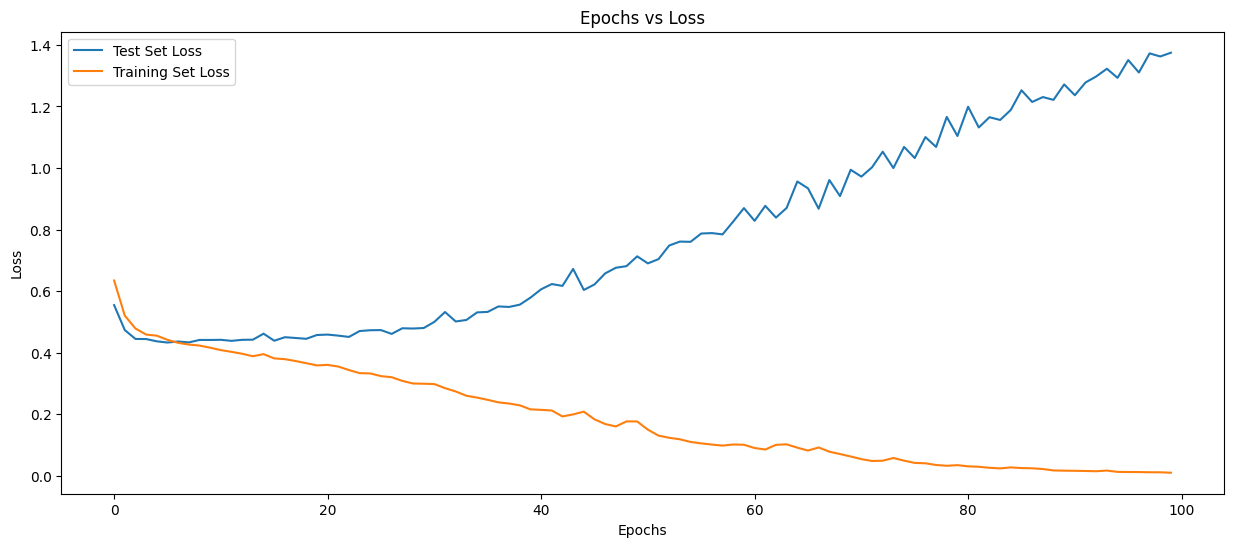

In [44]:
plt.figure(figsize = (15,6))
plt.plot(history.val_loss, label='Test Set Loss')
plt.plot(history.loss, label='Training Set Loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

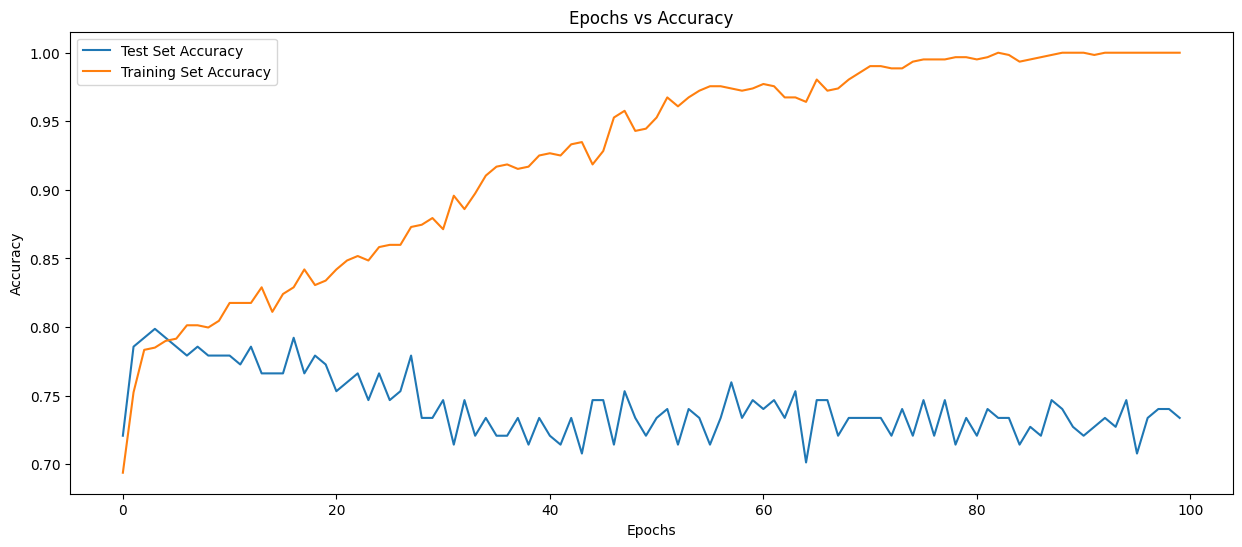

In [43]:
plt.figure(figsize = (15,6))
plt.plot(history.val_accuracy, label='Test Set Accuracy')
plt.plot(history.accuracy, label='Training Set Accuracy')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Implement Early Stopping

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

In [46]:
tf.random.set_seed(12345)

In [47]:
model_es = Sequential()

In [48]:
model_es.add(Input(shape = (X_train_scaled.shape[1],)))

In [49]:
model_es.add(Dense(units = 128, activation='relu'))

In [50]:
model_es.add(Dense(units = 64, activation = 'relu'))

In [51]:
model_es.add(Dense(units = 32, activation = 'relu'))

In [52]:
model_es.add(Dense(units = 1, activation = 'sigmoid'))

In [53]:
model_es.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1152      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11521 (45.00 KB)
Trainable params: 11521 (45.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
model_es.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics = 'accuracy')

In [55]:
es = EarlyStopping(monitor='val_accuracy',
                   verbose=1,
                   patience = 4)

In [56]:
result_es = model_es.fit(X_train_scaled,
                         y_train,
                         validation_data = (X_test_scaled, y_test),
                         epochs = 100,
                         callbacks=[es]
                        )

Epoch 1/100
20/20 [==============================] - 1s 13ms/step - loss: 0.6021 - accuracy: 0.7003 - val_loss: 0.5049 - val_accuracy: 0.7662
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4981 - accuracy: 0.7655 - val_loss: 0.4455 - val_accuracy: 0.7662
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4679 - accuracy: 0.7704 - val_loss: 0.4313 - val_accuracy: 0.7792
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4545 - accuracy: 0.7801 - val_loss: 0.4398 - val_accuracy: 0.7792
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4449 - accuracy: 0.7932 - val_loss: 0.4379 - val_accuracy: 0.7857
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4442 - accuracy: 0.7866 - val_loss: 0.4349 - val_accuracy: 0.7662
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4349 - accuracy: 0.7915 - val_loss: 0.4299 - val_accuracy: 0.7727
Epoch 8/100


In [57]:
history_es = pd.DataFrame(result_es.history)

In [60]:
history_es.head()

,loss,accuracy,val_loss,val_accuracy
0,0.602069,0.700326,0.504865,0.766234
1,0.498095,0.765472,0.445493,0.766234
2,0.467938,0.770358,0.431260,0.779221
3,0.454459,0.780130,0.439774,0.779221
4,0.444879,0.793160,0.437930,0.785714


In [63]:
np.unique(y_train), np.unique(y_train_pred >=0.5)

(array([0, 1]), array([False,  True]))

In [62]:
y_train[0:5]

128    1
626    0
328    1
634    0
511    0
Name: Outcome, dtype: int64

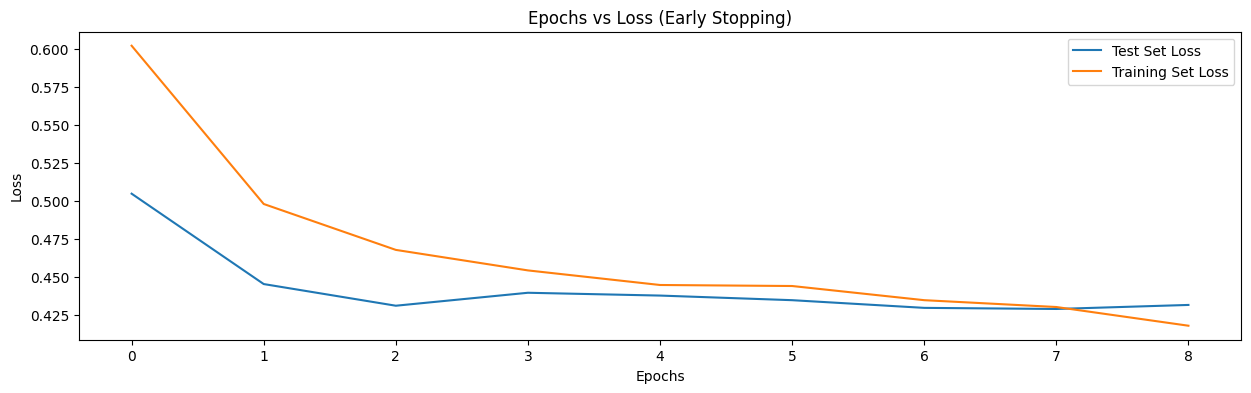

In [58]:
plt.figure(figsize = (15,4))
plt.plot(history_es.val_loss, label='Test Set Loss')
plt.plot(history_es.loss, label='Training Set Loss')
plt.title('Epochs vs Loss (Early Stopping)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

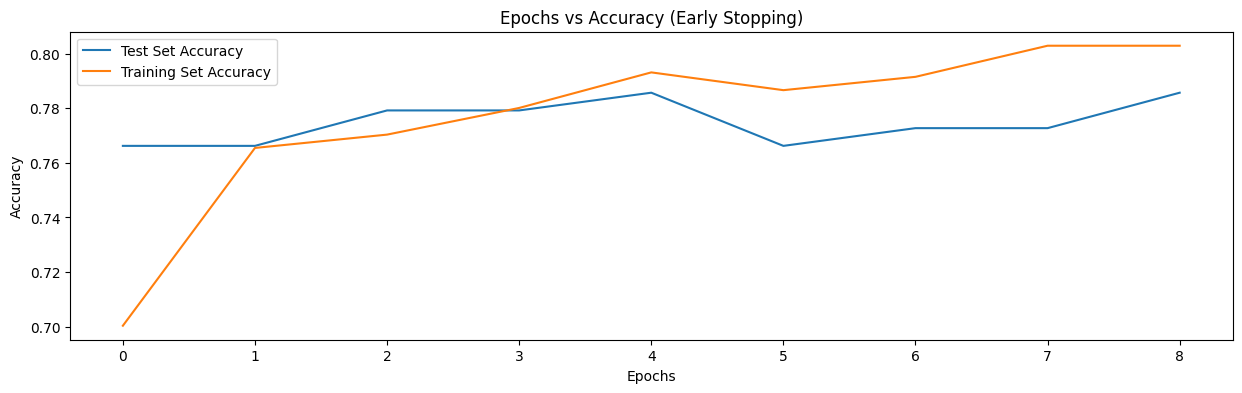

In [59]:
plt.figure(figsize = (15,4))
plt.plot(history_es.val_accuracy, label='Test Set Accuracy')
plt.plot(history_es.accuracy, label='Training Set Accuracy')
plt.title('Epochs vs Accuracy (Early Stopping)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Implementing L1 Regularization

In [64]:
tf.random.set_seed(12345)

In [78]:
model_reg = Sequential()

In [79]:
model_reg.add(Input(shape = (X_train_scaled.shape[1],)))

In [80]:
# First Hidden Layer - 128 neurons, Relu activation, L1 Regularizer for the Kernel
model_reg.add(Dense(units=128,
                    activation='relu',
                    kernel_regularizer = tf.keras.regularizers.L1()
                   )
             )

In [81]:
# Second Hidden Layer - 64 neurons, Relu activation, L1 Regularizer for the Kernel
model_reg.add(Dense(units=64,
                    activation='relu',
                    kernel_regularizer = tf.keras.regularizers.L1()))

In [82]:
# Third Hidden Layer 32, relu
model_reg.add(Dense(units=32,
                    activation='relu'))

In [83]:
# Output layer - Sigmoid
model_reg.add(Dense(units=1,
                    activation='sigmoid'))

In [84]:
model_reg.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               1152      
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11521 (45.00 KB)
Trainable params: 11521 (45.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [85]:
model_reg.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = 'accuracy')

In [86]:
model_reg.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               1152      
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11521 (45.00 KB)
Trainable params: 11521 (45.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [87]:
result_reg = model_reg.fit(X_train_scaled,
                           y_train,
                           validation_data = (X_test_scaled, y_test),
                           epochs=100)

Epoch 1/100
20/20 [==============================] - 1s 13ms/step - loss: 8.1788 - accuracy: 0.6694 - val_loss: 7.2486 - val_accuracy: 0.7208
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 6.5415 - accuracy: 0.7068 - val_loss: 5.7204 - val_accuracy: 0.7143
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 5.1092 - accuracy: 0.7362 - val_loss: 4.3959 - val_accuracy: 0.7338
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 3.8840 - accuracy: 0.7541 - val_loss: 3.2877 - val_accuracy: 0.7468
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 2.8690 - accuracy: 0.7541 - val_loss: 2.3846 - val_accuracy: 0.7403
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 2.0580 - accuracy: 0.7655 - val_loss: 1.6817 - val_accuracy: 0.7597
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 1.4426 - accuracy: 0.7655 - val_loss: 1.1682 - val_accuracy: 0.7727
Epoch 8/100


In [75]:
history_reg = pd.DataFrame(result_reg.history)

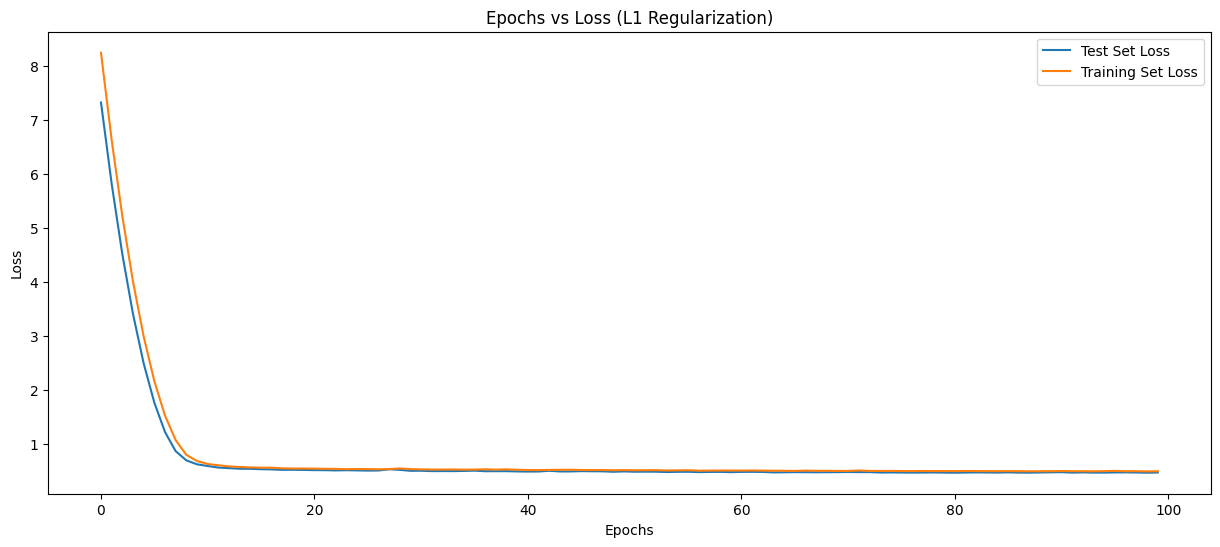

In [77]:
plt.figure(figsize = (15,6))
plt.plot(history_reg.val_loss, label='Test Set Loss')
plt.plot(history_reg.loss, label='Training Set Loss')
plt.title('Epochs vs Loss (L1 Regularization)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Implement Dropout Regularization

In [88]:
from tensorflow.keras.layers import Dropout

In [99]:
model_drp = Sequential()

In [100]:
model_drp.add(Input(shape = (X_train_scaled.shape[1],)))

In [101]:
model_drp.add(Dense(units=128,
                    activation='relu'
                   )
             )

In [102]:
model_drp.add(Dropout(rate = 0.4, seed = 12345 ))

In [103]:
model_drp.add(Dense(units=64, activation='relu'))

In [104]:
model_drp.add(Dropout(rate = 0.3, seed=12345))

In [105]:
model_drp.add(Dense(units=32, activation='relu'))

In [106]:
model_drp.add(Dropout(rate = 0.25, seed=12345))

In [107]:
model_drp.add(Dense(units=1, activation='sigmoid'))

In [108]:
model_drp.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               1152      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_23 (Dense)            (None, 1)                

In [109]:
model_drp.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = 'accuracy')

In [110]:
result_drp = model_drp.fit(X_train_scaled,
                           y_train,
                           validation_data = (X_test_scaled, y_test),
                           epochs=100)

Epoch 1/100
20/20 [==============================] - 1s 13ms/step - loss: 0.6730 - accuracy: 0.6140 - val_loss: 0.6068 - val_accuracy: 0.7273
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6020 - accuracy: 0.6857 - val_loss: 0.5376 - val_accuracy: 0.7532
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5548 - accuracy: 0.7215 - val_loss: 0.4744 - val_accuracy: 0.7792
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5278 - accuracy: 0.7573 - val_loss: 0.4527 - val_accuracy: 0.7792
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5210 - accuracy: 0.7362 - val_loss: 0.4412 - val_accuracy: 0.7792
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4958 - accuracy: 0.7752 - val_loss: 0.4381 - val_accuracy: 0.7727
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5094 - accuracy: 0.7476 - val_loss: 0.4348 - val_accuracy: 0.7792
Epoch 8/100


In [111]:
history_drp = pd.DataFrame(result_drp.history)

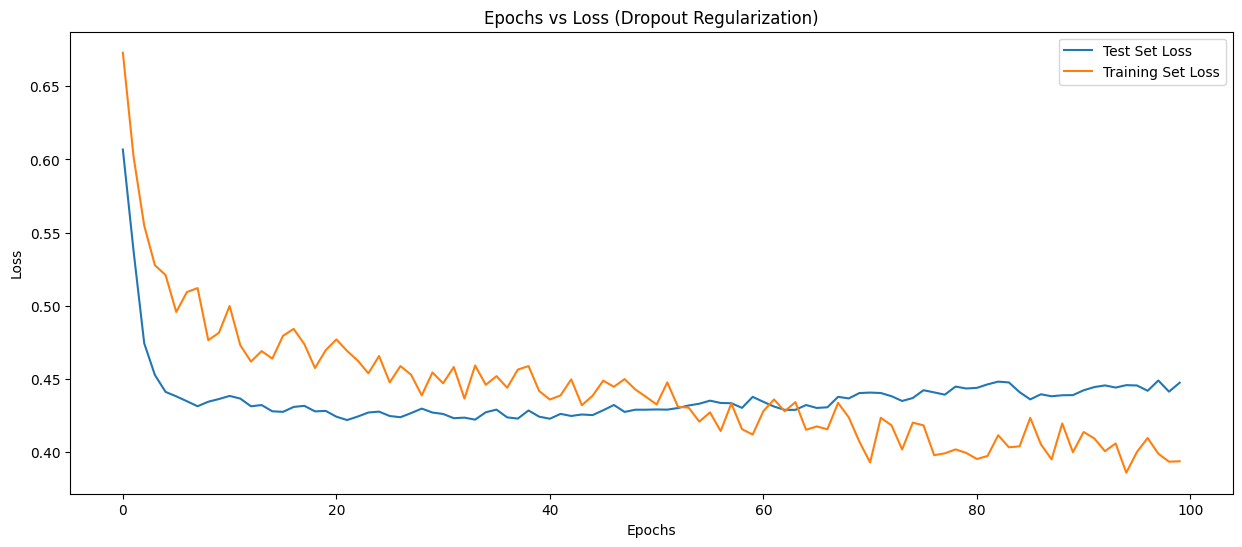

In [112]:
plt.figure(figsize = (15,6))
plt.plot(history_drp.val_loss, label='Test Set Loss')
plt.plot(history_drp.loss, label='Training Set Loss')
plt.title('Epochs vs Loss (Dropout Regularization)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

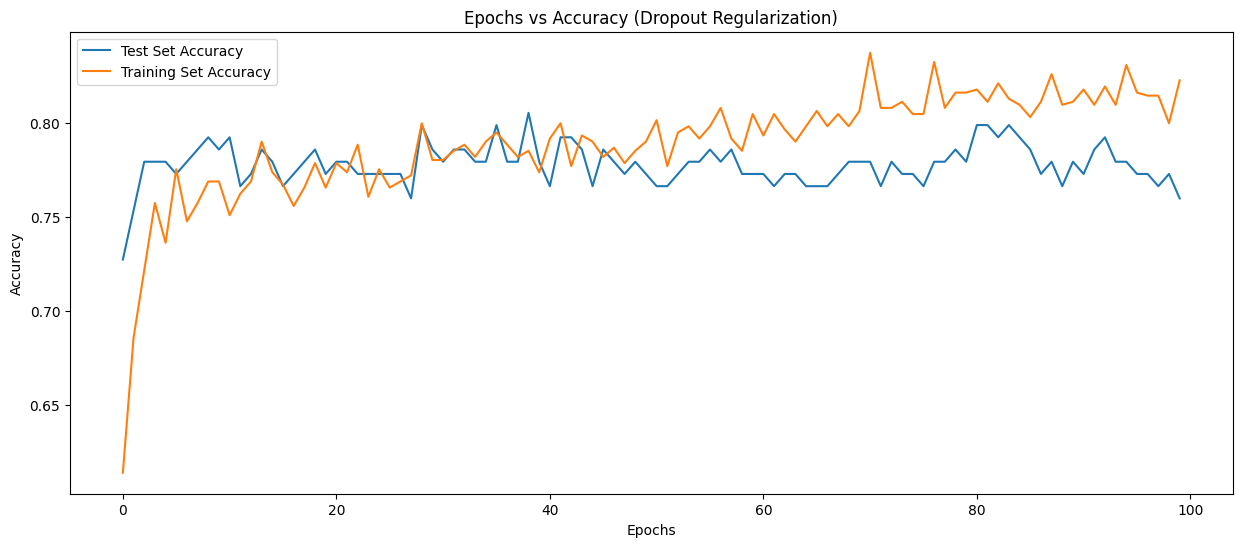

In [113]:
plt.figure(figsize = (15,6))
plt.plot(history_drp.val_accuracy, label='Test Set Accuracy')
plt.plot(history_drp.accuracy, label='Training Set Accuracy')
plt.title('Epochs vs Accuracy (Dropout Regularization)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()